<style>
    .zero-margin {
        margin: 0 px;
     }
</style>

<div class="zero-margin" style="text-align: center;">
    <p style="text-align: center; font-size: 20px; margin-bottom: 10px;">Practice Case 03<p>
    <p style="text-align: center; font-size: 40px; margin: 0px; font-weight: bold;text-transform: uppercase;">Sentiment Analysis</p><br/>
    <p  style="text-align: center; margin-bottom: 0px;">Tuesday, October 31st 2019</p>
     <p  style="text-align: center; margin-top: 0px;">M. Haries Ramdhani</p>
</div>

For this practice case I tried to perform sentiment analysis for the top 10 places in Indonesia based on this [article](https://www.touropia.com/best-places-to-visit-in-indonesia/). The data is collected from the subreddit [r/travel](reddit.com/r/travel) on Oct 31st 2019. The data collection was done using the Reddit pushshift API, it takes maximum of 500 comments for each of the places that are listed in the article 

In [3]:
import pandas as pd 
import numpy as np

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re
import time

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import requests
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m.haris01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
# List all of the top 10 places
cities = ["raja%ampat", "tanjung%puting", "flores", "toraja", "bukit%lawang", "bromo", "lombok", "komodo", "yogyakarta", "bali"]

comments = {}

SIZE = 500

# Get the data from the reddit pushshift
for city in cities:
    print(f"GET {city} COMMENTS STARTED")
    
    comments[city] = []
    
    doc = f"https://api.pushshift.io/reddit/search/comment/?q={city}&size={SIZE}&subreddit=travel"
    
    response = requests.get(doc, timeout = 10)
    
    data = json.loads(response.content)
    data = data["data"]
    
    for i in range(len(data)):
        comments[city].append(data[i]['body'])
        
    print(f"GOT {len(comments[city])} {city} COMMENTS")
    print("")
    
    time.sleep(5)

GET raja%ampat COMMENTS STARTED
GOT 161 raja%ampat COMMENTS

GET tanjung%puting COMMENTS STARTED
GOT 10 tanjung%puting COMMENTS

GET flores COMMENTS STARTED
GOT 500 flores COMMENTS

GET toraja COMMENTS STARTED
GOT 68 toraja COMMENTS

GET bukit%lawang COMMENTS STARTED
GOT 118 bukit%lawang COMMENTS

GET bromo COMMENTS STARTED
GOT 360 bromo COMMENTS

GET lombok COMMENTS STARTED
GOT 500 lombok COMMENTS

GET komodo COMMENTS STARTED
GOT 500 komodo COMMENTS

GET yogyakarta COMMENTS STARTED
GOT 368 yogyakarta COMMENTS

GET bali COMMENTS STARTED
GOT 500 bali COMMENTS



# Section B : Data Preprocessing

## Step B.1. Basic Text Pre-processing 

### 1. Lower casing

In [78]:
for city in cities:
    comments[city] = [comment.lower() for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,&gt; she doesn't like to be around a lot of pe...
1,mid april temperatures would be pretty high in...
2,"no, you can't. airbnb has an age limit of 18, ..."
3,i went to borneo and hired a boat to take me u...
4,the budget is depending on your wishes comfort...


### 2. Punctuation removal

In [79]:
for city in cities:
    comments[city] = [re.sub(r'[^\w\s]', '', comment) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,gt she doesnt like to be around a lot of peopl...
1,mid april temperatures would be pretty high in...
2,no you cant airbnb has an age limit of 18 and ...
3,i went to borneo and hired a boat to take me u...
4,the budget is depending on your wishes comfort...


### 3. Stopwords removal

In [81]:
stop = stopwords.words('english')

for city in cities:
    comments[city] = [" ".join(list(set(comment.split()) - set(stop))) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

### 4. Frequent words removal

In [101]:
freqs = {}
for city in cities:
    freq = pd.Series(" ".join(comments[city]).split()).value_counts()[:10]
    freq = list(freq.index)
    
    freqs[city] = freq
freqs['bali']

['would',
 'much',
 'days',
 'good',
 'ubud',
 'dont',
 'places',
 'around',
 'beach',
 'island']

In [102]:
for city in cities:
    comments[city] = [" ".join(x for x in comment.split() if x not in freqs[city]) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

'mind typical think daughter well place tropical tao itd wants try resort certainly restaurants classes best first perfectly north compared gt islands personally japan relaxed enjoy cost low im side might chiang koh fine vegan comes away beaches doesnt travel book lots although thailand day preferred atmosphere anywhere nido busy tours lot mother less cooking mai el people else sure east views temples isnt sea jungles southern somewhere plenty'

### 5. Rare words removal

In [103]:
rares = {}
for city in cities:
    rare = pd.Series(" ".join(comments[city]).split()).value_counts()[-10:]
    rare = list(rare.index)
    
    rares[city] = rare
rares['bali']

['ready',
 'essence',
 'uneditedhttpsimgurcomgalleryosuftth',
 'hammocks',
 'external',
 'hardest',
 'disillusioned',
 'minus',
 'fraction',
 'peanut']

In [104]:
for city in cities:
    comments[city] = [" ".join(x for x in comment.split() if x not in rares[city]) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

'mind typical think daughter well place tropical tao itd wants try resort certainly restaurants classes best first perfectly north compared gt islands personally japan relaxed enjoy cost low im side might chiang koh fine vegan comes away beaches doesnt travel book lots although thailand day preferred atmosphere anywhere nido busy tours lot mother less cooking mai el people else sure east views temples isnt sea jungles southern somewhere plenty'

### 6. Spelling correction

In [112]:
for city in cities:
    print(f"{city} COMMENTS CORRECTION STARTED")
    comments[city] = [str(TextBlob(comment).correct()) for comment in comments[city]]
    
    print(f"{city} COMMENTS {len(comments[city])} CORRECTED")

### 7. Tokenization

In [113]:
TextBlob(comments['bali'][1]).words

WordList(['hope', 'country', 'mid', 'know', 'pick', 'strong', 'krabi', 'weather', 'bangkok', 'well', 'general', 'closer', 'april', 'another', 'restaurants', 'strugged', 'massage', 'currents', '2016', 'best', 'inland', 'phuket', 'option', 'food', 'water', 'high', 'relaxation', 'could', 'japan', 'land', 'vibe', 'spa', 'phi', 'australia', 'oriented', 'temperatures', 'pool', 'cairns', 'use', 'beaches', 'asia', 'lots', 'helps', 'culture', 'amazing', 'cool', 'bit', 'remembering', 'barring', 'interesting', 'shopping', 'sure', 'temples', 'pretty', 'bondi', 'vegetarian', 'resorts'])

### 8. Stemming

In [115]:
st = PorterStemmer()
for city in cities:
    print(f"{city} COMMENTS STEMMING STARTED")
    
    comments[city] = [" ".join([st.stem(word) for word in comment.split()]) for comment in comments[city]]
    print(f"{city} COMMENTS {len(comments[city])} STEMMED")

raja%ampat COMMENTS STEMMING STARTED
raja%ampat COMMENTS 161 STEMMED
tanjung%puting COMMENTS STEMMING STARTED
tanjung%puting COMMENTS 10 STEMMED
flores COMMENTS STEMMING STARTED
flores COMMENTS 500 STEMMED
toraja COMMENTS STEMMING STARTED
toraja COMMENTS 68 STEMMED
bukit%lawang COMMENTS STEMMING STARTED
bukit%lawang COMMENTS 118 STEMMED
bromo COMMENTS STEMMING STARTED
bromo COMMENTS 360 STEMMED
lombok COMMENTS STEMMING STARTED
lombok COMMENTS 500 STEMMED
komodo COMMENTS STEMMING STARTED
komodo COMMENTS 500 STEMMED
yogyakarta COMMENTS STEMMING STARTED
yogyakarta COMMENTS 368 STEMMED
bali COMMENTS STEMMING STARTED
bali COMMENTS 500 STEMMED


In [116]:
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,mind typic think daughter well place tropic ta...
1,hope countri mid know pick strong krabi weathe...
2,altern practic limit age airbnb admit imposs d...
3,hindu monument homo buddhist snorkel wonder ki...
4,countri need probabl mayb comfortwis summer gi...


## Aggregating the Sentiments

In [164]:
sentiments = {}
sentiment_classes = {}

for city in cities:
    sentiments[city] = []
    sentiment_classes[city] = []
    
    for comment in comments[city]:
        textB = TextBlob(comment)

        sentiment = textB.sentiment.polarity
        sentiments[city].append(sentiment)

        if sentiment < 0.00:
            sentiment_classes[city].append('Negative')
        elif sentiment > 0.00:
            sentiment_classes[city].append('Positive')
        else:
            sentiment_classes[city].append('Neutral')

In [165]:
df = {}

In [166]:
for city in cities:
    df[city] = pd.DataFrame({"comment": comments[city], "sentiment": sentiments[city], "sentiment_class": sentiment_classes[city]})

In [170]:
df[city].groupby(['sentiment_class'])['sentiment_class'].count()

sentiment_class
Negative     19
Neutral      30
Positive    112
Name: sentiment_class, dtype: int64

In [171]:
sentiment_types = {}
sentiment_counts = {}
charts = {}

for city in cities:
    sentiment = df[city].groupby(['sentiment_class'])['sentiment_class'].count()

    sentiment_types[city] = sentiment.index
    sentiment_counts[city] = sentiment.values
    
    charts[city] = pd.DataFrame({"sentiment": sentiment_types[city], "count": sentiment_counts[city]})[["sentiment", "count"]]
    charts[city]["percentage"] = charts[city]["count"] / charts[city]["count"].sum()

In [178]:
charts['bali']

,sentiment,count,percentage
0,Negative,79,0.158
1,Neutral,106,0.212
2,Positive,315,0.630


In [179]:
charts['raja%ampat']

,sentiment,count,percentage
0,Negative,19,0.118012
1,Neutral,30,0.186335
2,Positive,112,0.695652


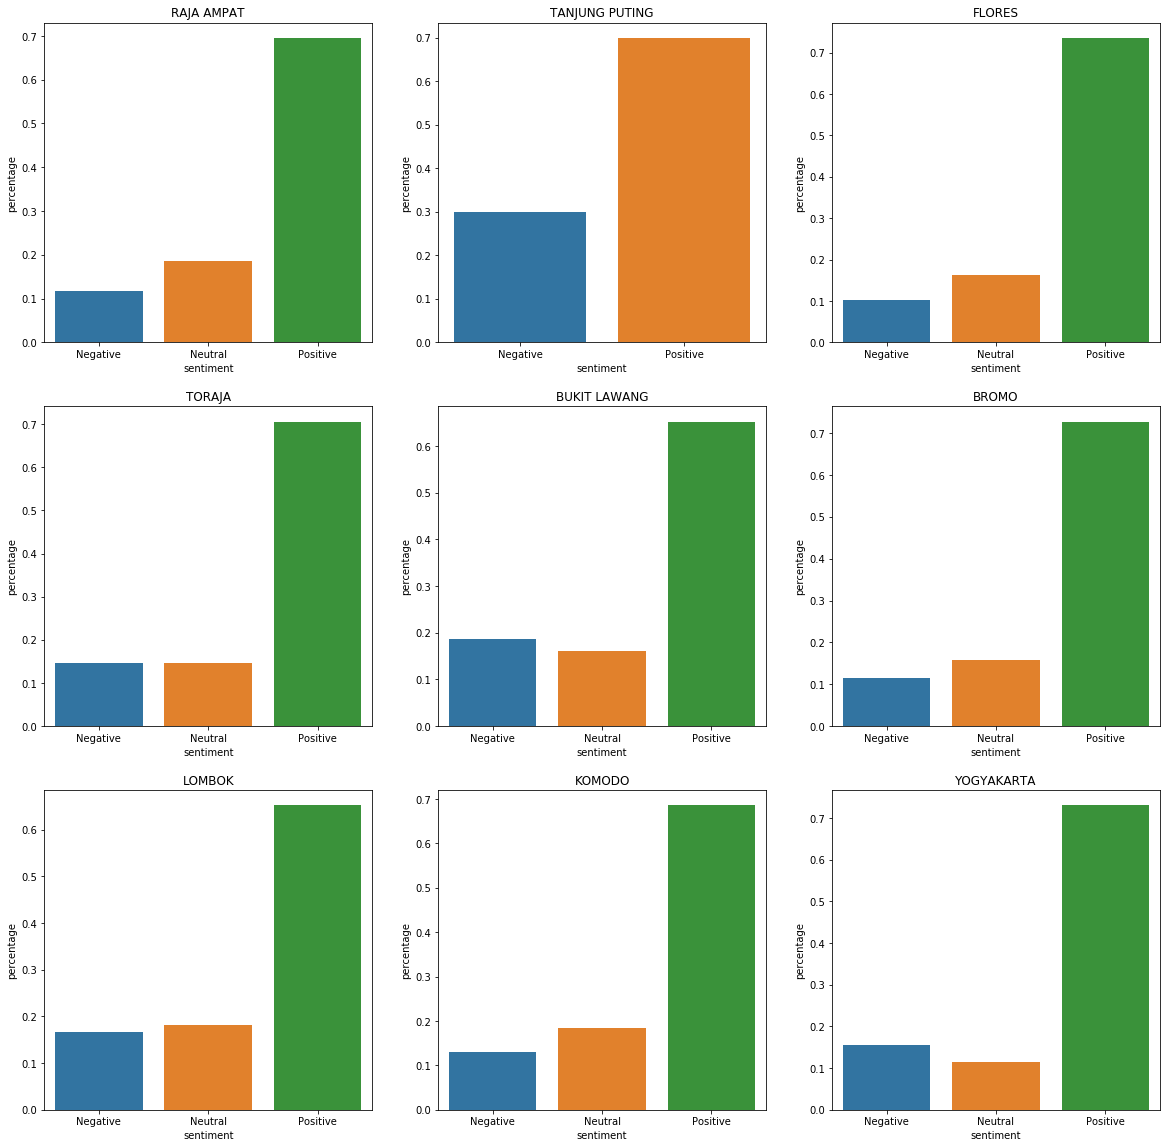

In [183]:
fig, axes = plt.subplots(round(len(cities) / 3), 3, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cities):
        sns.barplot(x='sentiment', y='percentage', data=charts[cities[i]], ax=ax)
        ax.set_title(cities[i].replace("%", " ").upper()) 